
<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Exploración de datos</h1>
  <p></p>
</div>

In [29]:
from pickle import load, dump
from seaborn import pairplot
import matplotlib.pyplot as plt
from seaborn import set
from seaborn import heatmap
from pandas import Categorical
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [30]:
#Nombre de lariables de interes
cat_col = ['Fecha','Hora']
label = 'H_Cant_Veh' 

In [31]:
#list((gb_df.groups.keys()))

### Cargar Datos

In [32]:
# Load data (deserialize)
with open('../Data/df.pickle', 'rb') as handle:
    df = load(handle)

In [33]:
df.head(10)

,Fecha,Hora,Nombre_autopista,Nombre_dispositivo,Ubicación_dispositivo,Sentido,Latitud,Longitud,Num_vehiculos_hora
36410,2021-01-01,0,AU Dellepiane,RD111 Ramal 9,0.18,B,-34.65061,-58.46677,60
36411,2021-01-01,1,AU Dellepiane,RD111 Ramal 9,0.18,B,-34.65061,-58.46677,142
36412,2021-01-01,2,AU Dellepiane,RD111 Ramal 9,0.18,B,-34.65061,-58.46677,228
36413,2021-01-01,3,AU Dellepiane,RD111 Ramal 9,0.18,B,-34.65061,-58.46677,130
36414,2021-01-01,4,AU Dellepiane,RD111 Ramal 9,0.18,B,-34.65061,-58.46677,76
36415,2021-01-01,5,AU Dellepiane,RD111 Ramal 9,0.18,B,-34.65061,-58.46677,116
36416,2021-01-01,6,AU Dellepiane,RD111 Ramal 9,0.18,B,-34.65061,-58.46677,118
36417,2021-01-01,7,AU Dellepiane,RD111 Ramal 9,0.18,B,-34.65061,-58.46677,104
36418,2021-01-01,8,AU Dellepiane,RD111 Ramal 9,0.18,B,-34.65061,-58.46677,96
36419,2021-01-01,9,AU Dellepiane,RD111 Ramal 9,0.18,B,-34.65061,-58.46677,94


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156511 entries, 36410 to 153281
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Fecha                  156511 non-null  datetime64[ns]
 1   Hora                   156511 non-null  int64         
 2   Nombre_autopista       156511 non-null  object        
 3   Nombre_dispositivo     156511 non-null  object        
 4   Ubicación_dispositivo  156511 non-null  object        
 5   Sentido                156511 non-null  object        
 6   Latitud                156511 non-null  object        
 7   Longitud               156511 non-null  object        
 8   Num_vehiculos_hora     156511 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 11.9+ MB


In [35]:
# Segmentar los datos por 'Nombre_autopista','Nombre_dispositivo','Sentido'
gb_df = df.groupby(['Nombre_autopista','Nombre_dispositivo','Sentido'])

In [36]:
#número de muestras por cada grupo 
for group_name, df_group in gb_df:
    print(group_name)
    print(df_group.size)

('AU 4  Lugones', 'RD165 Dorrego', 'A')
46413
('AU 4  Lugones', 'RD166 Ombues', 'A')
52623
('AU 4  Lugones', 'RD168 Juramento', 'A')
52695
('AU 4  Lugones', 'RD169 Monroe', 'A')
45918
('AU 4  Lugones', 'RD170 Udaondo', 'A')
45027
('AU 4  Lugones', 'RD171 Esma', 'A')
39906
('AU 5 Cantilo', 'RD180 Encalada', 'B')
52992
('AU 5 Cantilo', 'RD181 Ciudad Univer.', 'B')
47484
('AU 5 Cantilo', 'RD182 Labruna', 'B')
38484
('AU 5 Cantilo', 'RD183 Centro Naval', 'B')
40518
('AU 7 Campora', 'RD190 Campora A', 'A')
6336
('AU 9 de Julio Sur', 'RD125 Osv.Cruz A', 'A')
52596
('AU 9 de Julio Sur', 'RD126 Osv.Cruz B', 'B')
45351
('AU 9 de Julio Sur', 'RD127 Ben.Q.Martín A', 'A')
52614
('AU 9 de Julio Sur', 'RD128 Ben.Q.Martín B', 'B')
45918
('AU 9 de Julio Sur', 'RD129 Olavarria', 'B')
46062
('AU 9 de Julio Sur', 'RD130 Suarez', 'A')
46062
('AU 9 de Julio Sur', 'RD131 Brandsen B', 'B')
45927
('AU 9 de Julio Sur', 'RD134 Ituzaingo', 'A')
45540
('AU 9 de Julio Sur', 'RD134 Ituzaingo', 'B')
45540
('AU 9 de 

### Estadísticas de las variables  númericas

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hora,156511.0,11.502891,6.921794,0.0,6.0,12.0,18.0,23.0
Num_vehiculos_hora,156511.0,2226.582426,1985.933472,0.0,564.0,1667.0,3377.0,9696.0


### Analisis de segmentos

In [38]:
df_segment_01 = gb_df.get_group(('AU 4  Lugones', 'RD165 Dorrego', 'A'))[['Fecha','Hora','Num_vehiculos_hora']]

In [39]:
df_segment_01

,Fecha,Hora,Num_vehiculos_hora
3524,2021-01-01,0,648
3525,2021-01-01,1,2636
3526,2021-01-01,2,3236
3527,2021-01-01,3,1843
3528,2021-01-01,4,1027
...,...,...,...
153277,2021-08-31,19,4348
153278,2021-08-31,20,3628
153279,2021-08-31,21,2322
153280,2021-08-31,22,1624


In [40]:
# Agregar a la hora de la toma de la muestra-
df_segment_01['Fecha'] +=  pd.to_timedelta(df.Hora, unit='h')


In [41]:
df_segment_01

,Fecha,Hora,Num_vehiculos_hora
3524,2021-01-01 00:00:00,0,648
3525,2021-01-01 01:00:00,1,2636
3526,2021-01-01 02:00:00,2,3236
3527,2021-01-01 03:00:00,3,1843
3528,2021-01-01 04:00:00,4,1027
...,...,...,...
153277,2021-08-31 19:00:00,19,4348
153278,2021-08-31 20:00:00,20,3628
153279,2021-08-31 21:00:00,21,2322
153280,2021-08-31 22:00:00,22,1624


Poner la fecha como indice 

In [42]:
df_segment_01 = df_segment_01.set_index('Fecha')
#df_segment_01 = df_segment_01.asfreq('30min')
df_segment_01 = df_segment_01.sort_index()

In [43]:
#Eliminar hora del data frame
del df_segment_01['Hora']

In [44]:
df_segment_01

,Num_vehiculos_hora
Fecha,
2021-01-01 00:00:00,648
2021-01-01 01:00:00,2636
2021-01-01 02:00:00,3236
2021-01-01 03:00:00,1843
2021-01-01 04:00:00,1027
...,...
2021-08-31 19:00:00,4348
2021-08-31 20:00:00,3628
2021-08-31 21:00:00,2322


In [45]:
# Verificar que un índice temporal está completo
# ==============================================================================
#(df_segment_01.index == pd.date_range(start=df_segment_01.index.min(),
#                              end=df_segment_01.index.max(),
#                              freq=df_segment_01.index.freq)).all()


# Da un error de longitud, es posible que falten días dentro de la serie

Obtener la fecha de inicio 

In [46]:
df_segment_01.index.min()

Timestamp('2021-01-01 00:00:00')

Fecha final 

In [47]:
df_segment_01.index.max()

Timestamp('2021-08-31 23:00:00')

In [48]:


# Separación datos train-val-test
# ==============================================================================

fin_train = '2021-05-31 23:00:00'
fin_validacion = '2021-07-31 23:00:00'
datos_train = df_segment_01.loc[: fin_train, :]
datos_val   = df_segment_01.loc[fin_train:fin_validacion, :]
datos_test  = df_segment_01.loc[fin_validacion:, :]

print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}")



Fechas train      : 2021-01-01 00:00:00 --- 2021-05-31 23:00:00
Fechas validacion : 2021-05-31 23:00:00 --- 2021-07-31 23:00:00
Fechas test       : 2021-07-31 23:00:00 --- 2021-08-31 23:00:00


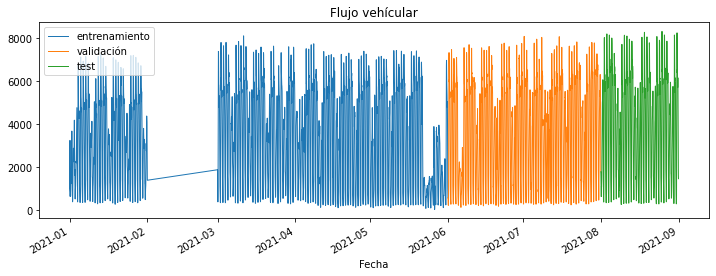

In [49]:
# Gráfico serie temporal
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 4))
datos_train.Num_vehiculos_hora.plot(ax=ax, label='entrenamiento', linewidth=1)
datos_val.Num_vehiculos_hora.plot(ax=ax, label='validación', linewidth=1)
datos_test.Num_vehiculos_hora.plot(ax=ax, label='test', linewidth=1)
ax.set_title('Flujo vehícular')
ax.legend();

<div class="alert alert-info" role="alert">
<ul>
<li> El gráfico anterior muestra que el flujo vehicular tiene estacionalidad mensual. Se observa un decremento  en el mes de Mayo y picos de flujo en todos los meses

<li> Por cuestiones de tiempo para una análsis de viabilidad, y dado que es una POC de la cual se desconoce el sentido del negocio se descartara enero, y sólo se tomará de marzo a agosto 

<li> Se tomará Marzo-Junio como entrenamiento, Julio como test y Agosto como validación
  
    
</ul>
</div>

In [50]:
import datetime 


# Filtrar Marzo-Agosto
# ==============================================================================
df_segment_01 = df_segment_01[df_segment_01.index >= '2021-03-01 00:00:00']

#datetime.date(year=2021,month=3,day=1):datetime.date(year=2021,month=8,day=31)

### Zoom a la serie de tiempo 

Debido a la varianza de la serie temporal, no es posible apreciar con un solo gráfico el posible patrón intradiario

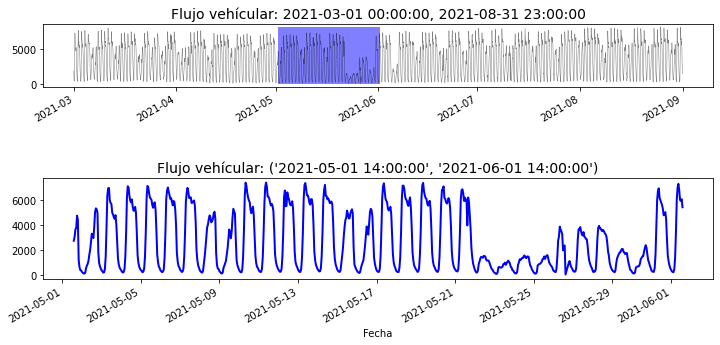

In [63]:


# Gráfico serie temporal con zoom
# ==============================================================================
zoom = ('2021-05-01 14:00:00','2021-06-01 14:00:00')

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])

df_segment_01.Num_vehiculos_hora.plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(df_segment_01.Num_vehiculos_hora)
max_y = max(df_segment_01.Num_vehiculos_hora)
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')

df_segment_01.loc[zoom[0]: zoom[1]].Num_vehiculos_hora.plot(ax=zoom_ax, color='blue', linewidth=2)

main_ax.set_title(f'Flujo vehícular: {df_segment_01.index.min()}, {df_segment_01.index.max()}', fontsize=14)
zoom_ax.set_title(f'Flujo vehícular: {zoom}', fontsize=14)
plt.subplots_adjust(hspace=1)



<div class="alert alert-info" role="alert">
<ul>
<li>Al aplicar zoom sobre la serie temporal, se hace patente una clara estacionalidad semanal, con consumos más elevados durante la semana laboral (lunes a viernes) y menor en los fines de semana.
<li>Se observa también que existe una posible correlación entre el flujo de un día con el del día anterior. LO cual se debe a 
    
</ul>
</div>

### Estacionalidad por  mes


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


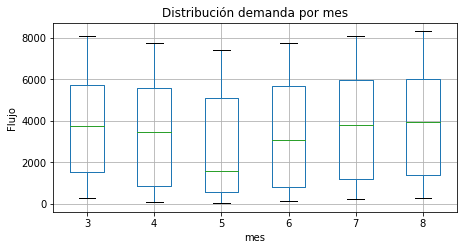

In [52]:
fig, ax = plt.subplots(figsize=(7, 3.5))
df_segment_01['mes'] = df_segment_01.index.month
df_segment_01.boxplot(column='Num_vehiculos_hora', by='mes', ax=ax,)
#df_segment_01.groupby('mes')['Num_vehiculos_hora'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Flujo')
ax.set_title('Distribución demanda por mes')
fig.suptitle('');

Se observa que hay una estacionalidad semestral, con valores de flujo (mediana) superiores en el mes de Agosto, y sin elevados picos de flujo en ninguno de los meses

#### Distribución

mes
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Num_vehiculos_hora, dtype: object

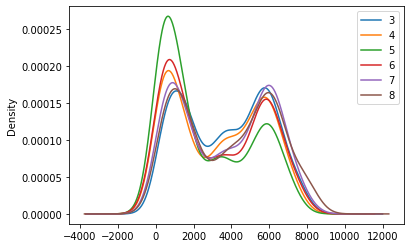

In [53]:
g = df_segment_01.groupby('mes')['Num_vehiculos_hora']
g.plot(kind='density', legend=True)

Se observa una distribución bimondal, es posible que se por el alza y la baja del flujo veicular en determinadas horas del día

### Estacionalidad por  semana


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


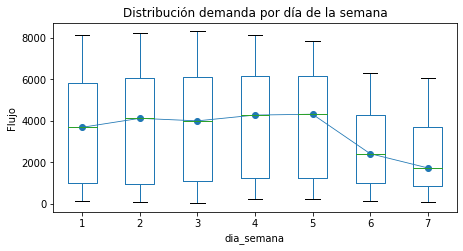

In [54]:
# Gráfico boxplot para estacionalidad semanal
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3.5))
df_segment_01['dia_semana'] = df_segment_01.index.day_of_week + 1
df_segment_01.boxplot(column='Num_vehiculos_hora', by='dia_semana', ax=ax)
df_segment_01.groupby('dia_semana')['Num_vehiculos_hora'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Flujo')
ax.set_title('Distribución demanda por día de la semana')
fig.suptitle('');

Se aprecia una estacionalidad semanal, con valores de demanda inferiores durante el fin de semana. 

### Estacionalidad por  día


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


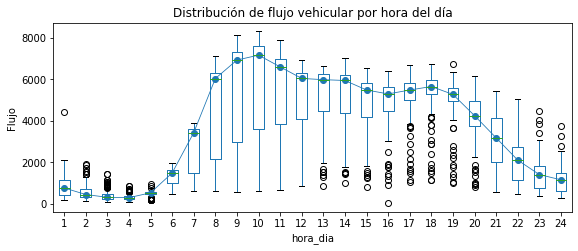

In [64]:
# Gráfico boxplot para estacionalidad diaria
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 3.5))
df_segment_01['hora_dia'] = df_segment_01.index.hour + 1
df_segment_01.boxplot(column='Num_vehiculos_hora', by='hora_dia', ax=ax)
df_segment_01.groupby('hora_dia')['Num_vehiculos_hora'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Flujo')
ax.set_title('Distribución de flujo vehicular por hora del día')
fig.suptitle('');



Existe estacionalidad diaria, la demanda se reduce entre las 23 y las 6 horas. 

Autocorrrelación se refiere a la correlación que hay en el componente de media movil, es decir en los errores pasados que tiene la serie. La covarianza enter el valor actual y los q valores resagados

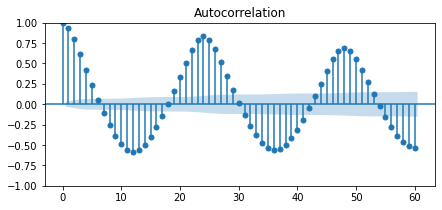

In [56]:


# Gráfico autocorrelación
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(df_segment_01.Num_vehiculos_hora, ax=ax, lags=60)
plt.show()



The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.


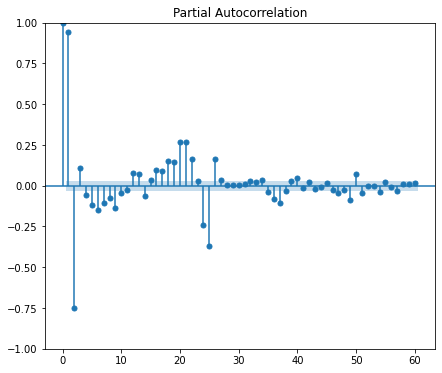

In [57]:


# Gráfico autocorrelación parcial
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 6))
plot_pacf(df_segment_01.Num_vehiculos_hora, ax=ax, lags=60)
plt.show()



Los gráficos de autocorrelación y autocorrelación parcial muestran una clara asociación entre el flujo de una hora y las horas anteriores, así como entre el flujo de una hora y la demanda de esa misma hora los días anteriores. Este tipo de correlación, es un indicativo de que los modelos autorregresivos pueden funcionar bien. 

### Distribuciónde los datos

### Gráficos de dispersión por pares

In [58]:
# NO aplica

### Mapa de correlación 

In [59]:
#No aplica

### Indices de sesgo y asimetría

NO aplica

### Datos categoricos

NO aplica

### Target 

No aplica

### Correlación entre las variables categóricas

No aplica

### Transformar el target a categórico

No aplica

### Correlacción de las variables con el target

NO aplica

### Correlación entre la variable `date` y el resto de variables 

No aplica

### Almacenamiento de datos

In [60]:
# Store data 
with open('../Data/data_processing.pickle', 'wb') as handle:
    dump(df_segment_01, handle)